In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

We will be train a classification model using Logistic Regression to classify the record as mine or rock 

# Data

In [2]:
#loading the dataset
sonar_data = pd.read_csv('sonar data.csv', header=None)
print(sonar_data.shape)

(208, 61)


In [3]:
#data preview
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
#we have balanced records between mines & rocks
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [5]:
#statistical description
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
#there are no null values in the data
sonar_data.isna().sum().sort_values().head(5) /sonar_data.shape[0]

0     0.0
32    0.0
33    0.0
34    0.0
35    0.0
dtype: float64

In [7]:
#coverting label column into numeric
sonar_data['label'] = np.where(sonar_data[60] == 'M', 1,0)
sonar_data.drop(60, axis=1, inplace= True)

sonar_data['label'].value_counts()

1    111
0     97
Name: label, dtype: int64

# EDA 

- We will perform correlation analysis to find features which explain higher variance for y_label(rock vs mine)
- Since the y_label is categorical, we will use point biserial correlation value & the associated p-values

In [8]:
from scipy.stats import pointbiserialr

def calculate_corr(df, label) :
    '''
    This function will calculate the point biserial correlation value
    between all the columns in the input df with the label column
    Input : df - dataframe 
            y_label - column with which correlation needs to be calculated
    Output : dataframe with calculated correlation value & the associated p-value
    '''
    
    output = {}
    for col in df.drop(label, axis =1).columns :
        output[col] = pointbiserialr(df[col].values, df[label].values)
        
    output = pd.DataFrame(output).T.reset_index()
    output.columns = ['Column', 'Corr', 'p_value']
    output = output.sort_values(by = 'Corr', ascending = False)
        
    return pd.DataFrame(output)

In [10]:
corr_df = calculate_corr(sonar_data, label= 'label').head(10)
corr_df.head(10)

,Column,Corr,p_value
10,10,0.432855,6.589226e-11
11,11,0.392245,4.643454e-09
48,48,0.351312,1.961342e-07
9,9,0.341142,4.596018e-07
44,44,0.339406,5.299154e-07
47,47,0.329333,1.190120e-06
8,8,0.321448,2.198013e-06
12,12,0.312811,4.220739e-06
45,45,0.305610,7.160147e-06
46,46,0.301697,9.487394e-06


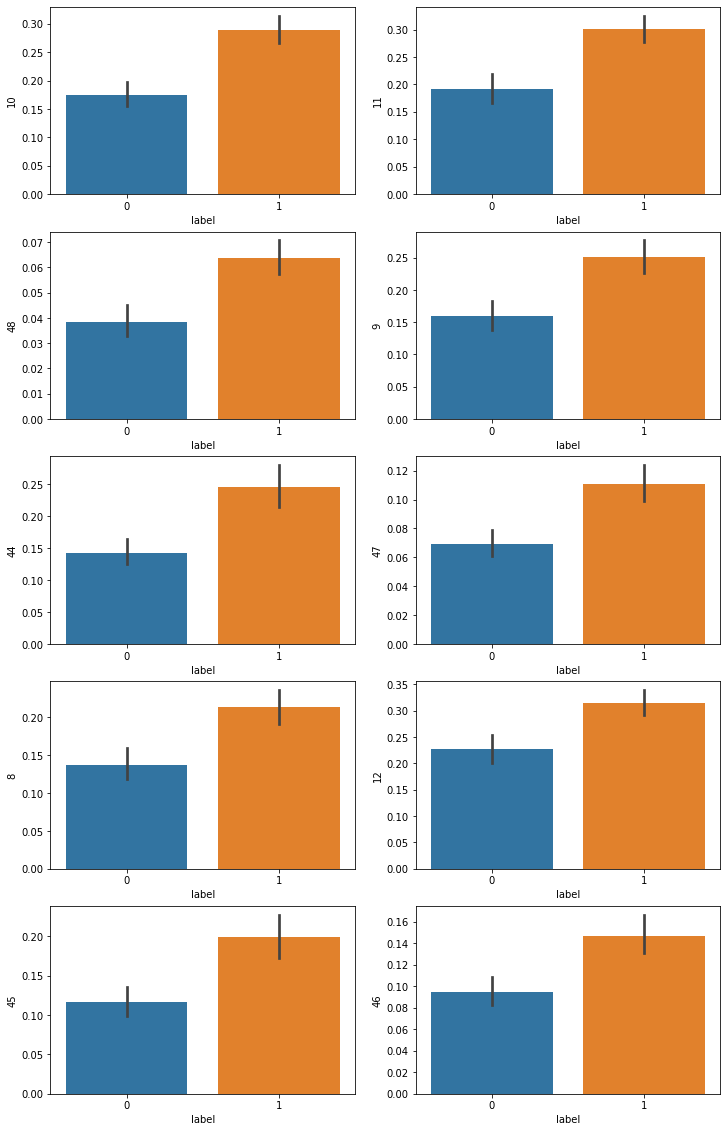

In [13]:
#bar plot for the top 10 features
fig, axes = plt.subplots(nrows= 5, ncols= 2, figsize = (12,20))
axes = axes.flatten()

for idx, col in enumerate(corr_df.iloc[:10]['Column'].to_list()) :
    sns.barplot(data = sonar_data, x = 'label', y = col, ax=  axes[idx] )
    
plt.show()

# Prepare dataset for Modeling 

In [16]:
# separating data and ;abels
X = sonar_data.drop(columns='label', axis=1)
y = sonar_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(187, 60) (187,)
(21, 60) (21,)


In [17]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns) #fit & transform the scaler on train data
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns) #only transform on test data

# Modeling & Evaluation 

In [19]:
model = LogisticRegression()
#training the Logistic Regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_prediction, y_train) 

print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9197860962566845


In [25]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_prediction, y_test) 

print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8095238095238095


In [37]:
#save the model
import pickle 
pickle.dump(model, open('log_model.pkl', 'wb'))

# Making Prediction

In [39]:
#load the model
trained_model = pickle.load(open('log_model.pkl', 'rb'))

#creating a random input data
input_data = np.random.randn(60).reshape(1,-1)

prediction = trained_model.predict(input_data)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

[1]
The object is a mine
